In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2

import pathlib
import os
import numpy as np

In [10]:
data_dir = pathlib.Path("Rice_Image_Dataset")

In [11]:
categories = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

image_lists = {category: list(data_dir.glob(f'{category}/*'))[:1000] for category in categories}


for category, images in image_lists.items():

    print(f"{category}: {len(images)} images loaded")

Arborio: 1000 images loaded
Basmati: 1000 images loaded
Ipsala: 1000 images loaded
Jasmine: 1000 images loaded
Karacadag: 1000 images loaded


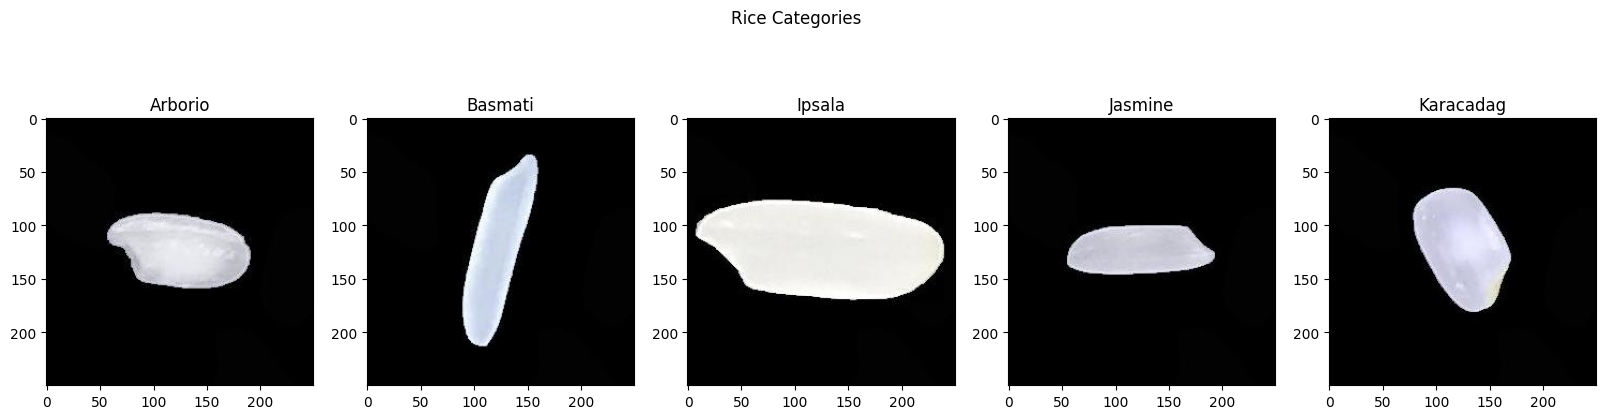

In [12]:
fig, ax = plt.subplots(ncols=len(categories), figsize=(20, 5))

fig.suptitle('Rice Categories')

for i, category in enumerate(categories):

    image_path = str(image_lists[category][0])  
    image = cv2.imread(image_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

    ax[i].imshow(image) 
    ax[i].set_title(category)  
    ax[i].axis('on')  

plt.show()

In [16]:
label_mapping = {category: index for index, category in enumerate(categories)}
df_images = image_lists
df_labels = label_mapping

print("라벨 번호:", df_labels)

라벨 번호: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


In [18]:
img_path = str(df_images['Arborio'][0]) 

img = cv2.imread(img_path)  


if img is not None:
    img_shape = img.shape  
    print("Image shape:", img_shape)  
else:
    print("로딩 실패")

Image shape: (250, 250, 3)


In [20]:

X, y = [], []  # X = images, y = labels

for label, images in df_images.items():

    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img, (224, 224))
            X.append(resized_img)
            y.append(df_labels[label])

X = np.array(X, dtype=np.float32) 
y = np.array(y, dtype=int) 

X /= 255.0

print("X(images):", X.shape)  
print("y(labels):", y.shape)  

X(images): (5000, 224, 224, 3)
y(labels): (5000,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 categories for rice types
])

c:\Users\park\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

val_loss, val_accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss:", val_loss)

print(f"Validation accuracy:", val_accuracy)